In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
file_path = '/content/drive/My Drive/Cibil/Balanced_Final_Finance.csv'

In [4]:
df = pd.read_csv(file_path)

In [5]:
df.head()

,borrower_id,age,gender,education,marital_status,num_dependents,residence_type,income,employment_status,loan_amount,loan_term,interest_rate,credit_score,debt_to_income_ratio,existing_loan_balance,previous_loans,previous_default,loan_purpose,monthly_repayment,risk
0,55303,41,Male,High School,Single,2,Own,12272,Self-Employed,60137,36,3.35,672,0.20,180588,1,1,Car purchase,1296.84,High
1,13387,62,Male,Master,Single,3,Rent,96816,Self-Employed,211548,36,5.94,792,0.28,55482,3,0,Education,12609.72,Low
2,95891,41,Female,PhD,Married,0,Rent,23460,Unemployed,74818,36,4.99,665,0.32,42192,4,0,Home improvement,2530.53,High
3,40856,40,Female,Master,Divorced,1,Rent,54214,Self-Employed,390918,60,6.48,762,0.28,165372,5,0,Car purchase,6294.80,Low
4,82054,43,Male,Bachelor,Single,5,Rent,54775,Employed,152884,36,4.80,751,0.23,92935,2,0,Car purchase,4291.61,Low


In [6]:
df.isnull().sum()

,0
borrower_id,0
age,0
gender,0
education,0
marital_status,0
num_dependents,0
residence_type,0
income,0
employment_status,0
loan_amount,0


In [7]:
df.describe()

,borrower_id,age,num_dependents,income,loan_amount,loan_term,interest_rate,credit_score,debt_to_income_ratio,existing_loan_balance,previous_loans,previous_default,monthly_repayment
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.00000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,55223.471200,46.552667,2.487200,56310.097333,196558.164933,47.82240,5.213207,735.414800,0.286767,111051.109867,3.045067,0.354667,5913.825720
std,25687.104484,13.342605,1.678991,31643.058702,86959.581763,9.93809,1.487707,46.616131,0.054991,53863.163143,1.420553,0.478444,3193.886338
min,10011.000000,20.000000,0.000000,0.000000,50841.000000,36.00000,3.000000,650.000000,0.200000,10177.000000,1.000000,0.000000,985.550000
25%,33078.250000,36.000000,1.000000,36761.250000,130894.750000,36.00000,3.880000,701.000000,0.240000,65696.750000,2.000000,0.000000,3346.880000
50%,55377.500000,49.000000,3.000000,58985.000000,186498.000000,48.00000,5.060000,750.000000,0.280000,114054.500000,3.000000,0.000000,5166.205000
75%,77240.750000,58.000000,4.000000,79351.750000,252703.250000,60.00000,6.470000,773.000000,0.320000,157872.000000,4.000000,1.000000,8071.092500
max,99994.000000,65.000000,5.000000,119659.000000,398694.000000,60.00000,7.990000,800.000000,0.400000,199858.000000,5.000000,1.000000,12960.020000


In [8]:
label_encoder = LabelEncoder()

In [9]:
df['gender'] = label_encoder.fit_transform(df['gender'])
df['education'] = label_encoder.fit_transform(df['education'])
df['marital_status'] = label_encoder.fit_transform(df['marital_status'])
df['residence_type'] = label_encoder.fit_transform(df['residence_type'])
df['employment_status'] = label_encoder.fit_transform(df['employment_status'])
df['loan_purpose'] = label_encoder.fit_transform(df['loan_purpose'])
df['previous_default'] = label_encoder.fit_transform(df['previous_default'])

In [10]:
X = df.drop(columns=['risk'])  # Features
y = df['risk'].map({'Low': 0, 'Medium': 1, 'High': 2}) #traget

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [14]:
model = RandomForestClassifier(random_state=42)

In [15]:
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [16]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [17]:
best_model = grid_search.best_estimator_

In [18]:
y_pred = best_model.predict(X_test_scaled)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 97.40%


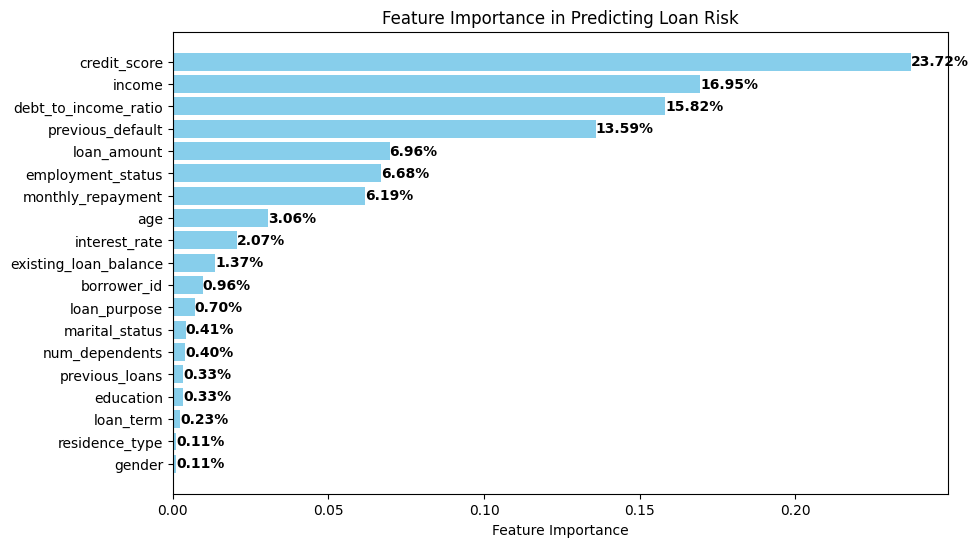

In [20]:
import matplotlib.pyplot as plt
import numpy as np

feature_importances = best_model.feature_importances_

feature_names = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

total_importance = feature_importance_df['Importance'].sum()
feature_importance_df['Percentage'] = (feature_importance_df['Importance'] / total_importance) * 100

plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width * 100 / total_importance:.2f}%',
             va='center', ha='left', color='black', fontweight='bold')

plt.xlabel('Feature Importance')
plt.title('Feature Importance in Predicting Loan Risk')
plt.gca().invert_yaxis()
plt.show()


In [21]:
selected_features = ['loan_amount', 'employment_status', 'credit_score', 'income', 'debt_to_income_ratio', 'age', 'interest_rate', 'existing_loan_balance', 'previous_default']
X_ = df[selected_features]
y_ = df['risk'].map({'Low': 0, 'Medium': 1, 'High': 2})

In [22]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.2, random_state=42)

In [23]:
scaler = StandardScaler()
X_train_scaled_ = scaler.fit_transform(X_train_)
X_test_scaled_ = scaler.transform(X_test_)

In [24]:
model_ = RandomForestClassifier(class_weight='balanced', random_state=42)

In [25]:
param_grid_ = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [26]:
grid_search_ = GridSearchCV(estimator=model_, param_grid=param_grid_, cv=3, n_jobs=-1, verbose=2)
grid_search_.fit(X_train_scaled_, y_train_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [27]:
best_model_ = grid_search_.best_estimator_

y_pred_ = best_model_.predict(X_test_scaled_)


accuracy_ = accuracy_score(y_test_, y_pred_)

print(f'Accuracy: {accuracy_ * 100:.2f}%')

Accuracy: 97.60%


In [28]:
import joblib

In [29]:
joblib.dump(best_model_, 'best_model.pkl')

['best_model.pkl']

In [30]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [31]:
import joblib

loaded_model = joblib.load('best_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')

def predict_risk():
    print("Please enter the following information:")

    loan_amount = float(input("Loan Amount: "))
    #employment_status = int(input("Employment Status (0 for Unemployed, 1 for Employed, 2 for Self-Employed): "))
    employment_input = input("Employment Status (Unemployed, Employed, Self-Employed): ").strip().lower()
    employment_mapping = {"unemployed": 0, "employed": 1, "self-employed": 2}
    if employment_input not in employment_mapping:
        print("Invalid employment status. Please enter one of: Unemployed, Employed, Self-Employed.")
        return
    employment_status = employment_mapping[employment_input]
    credit_score = int(input("Credit Score: "))
    income = float(input("Monthly Income: "))
    debt_to_income_ratio = float(input("Debt-to-Income Ratio (e.g., 0.35): "))
    age = int(input("Age: "))
    interest_rate = float(input("Interest Rate: "))
    existing_loan_balance = float(input("Existing Loan Balance: "))
    previous_default = int(input("Previous Default (0 for No, 1 for Yes): "))

    user_input = [[loan_amount, employment_status, credit_score, income, debt_to_income_ratio,age, interest_rate,existing_loan_balance,previous_default]]

    user_input_scaled = loaded_scaler.transform(user_input)

    prediction = loaded_model.predict(user_input_scaled)

    risk_mapping = {0: "Low", 1: "Medium", 2: "High"}
    predicted_risk = risk_mapping[prediction[0]]

    print(f"\nPredicted Risk: {predicted_risk}")

predict_risk()


Please enter the following information:
Loan Amount: 125693
Employment Status (Unemployed, Employed, Self-Employed): Employed
Credit Score: 780
Monthly Income: 80000
Debt-to-Income Ratio (e.g., 0.35): 0.2
Age: 32
Interest Rate: 1256
Existing Loan Balance: 45896
Previous Default (0 for No, 1 for Yes): 0

Predicted Risk: Medium


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


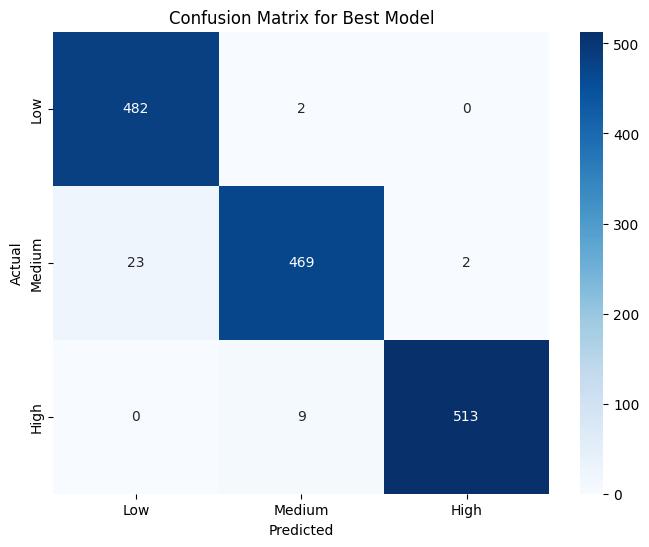

In [32]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test_, y_pred_)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Best Model')
plt.show()